# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [4]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [6]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,677,105,51,80,207,71,6,195,33,22,159,214,579,188,75,6,20,194,194
1,436,93,42,64,123,51,7,135,51,18,144,164,262,155,78,16,12,185,185
2,686,88,40,69,146,59,7,130,51,18,134,147,252,144,64,1,1,193,200
3,416,89,44,70,158,64,6,141,47,18,143,164,299,173,66,9,11,193,199
4,599,93,39,63,146,58,7,128,52,18,134,149,246,158,63,9,7,198,204
5,428,112,50,104,197,58,11,208,32,24,159,223,639,186,67,15,22,191,202
6,185,100,41,75,205,71,5,176,36,21,138,204,479,151,72,7,19,197,197
7,690,94,40,85,186,62,9,169,39,20,139,184,430,133,61,2,9,200,210
8,386,99,43,89,195,63,8,186,35,22,144,210,521,166,68,6,13,191,199
9,455,81,43,68,139,62,7,149,46,19,145,172,323,171,83,1,14,180,184


Methods `describe` and `info` deliver some useful information.

In [7]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,424.020036,94.063752,45.169399,82.943534,169.868852,61.551913,8.579235,170.355191,40.593807,20.715847,148.819672,189.825137,447.741348,176.054645,72.313297,6.387978,12.604736,188.887067,195.624772
std,245.317152,8.214591,6.256857,15.900538,33.802522,7.470840,4.039450,33.574836,7.909896,2.603224,14.699865,31.386722,178.006486,33.144187,7.135819,4.866533,8.712064,6.038350,7.249050
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,320.000000,150.000000,68.000000,3.000000,5.000000,185.000000,191.000000
50%,418.000000,93.000000,45.000000,81.000000,169.000000,61.000000,8.000000,159.000000,42.000000,20.000000,147.000000,180.000000,369.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,635.000000,100.000000,51.000000,100.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,161.000000,219.000000,610.000000,200.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.000000,49.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [8]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [19]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

def encode(y):
    y_df = pd.DataFrame(y)
    le = LabelEncoder()
    le.fit(y_df[0])
    y_df[0] = le.transform(y_df[0])
    encoded_y = np.array(y_df[0])
    return encoded_y

encoded_y_train = encode(y_train)
encoded_y_test = encode(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [22]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import scikitplot as skplt

# define model
model = LogisticRegression(
    solver='saga',
    l1_ratio=0,
    multi_class='multinomial',
    tol=1e-3,
    max_iter=500
)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', cv=cv)

def process(X_train, X_test, encoded_y_train):
    # execute search
    result = search.fit(X_train, encoded_y_train)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    #model.fit(X_train, encoded_y_train)
    #y_pred = model.predict(X_test)
    y_pred = result.predict(X_test)
    print('accuracy score is', accuracy_score(encoded_y_test, y_pred))
    print('f1 score is', f1_score(encoded_y_test, y_pred, average=None))
    # plot ROC curves
    y_probas = result.predict_proba(X_test)
    skplt.metrics.plot_roc(encoded_y_test, y_probas)
    plt.show()

Best Score: 0.7043434343434343
Best Hyperparameters: {'C': 0.001, 'penalty': 'none'}
accuracy score is 0.7272727272727273
f1 score is [0.85393258 0.52459016 0.56934307 0.87898089]


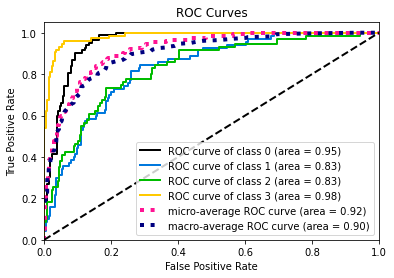

In [23]:
process(X_train, X_test, encoded_y_train)

In [11]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

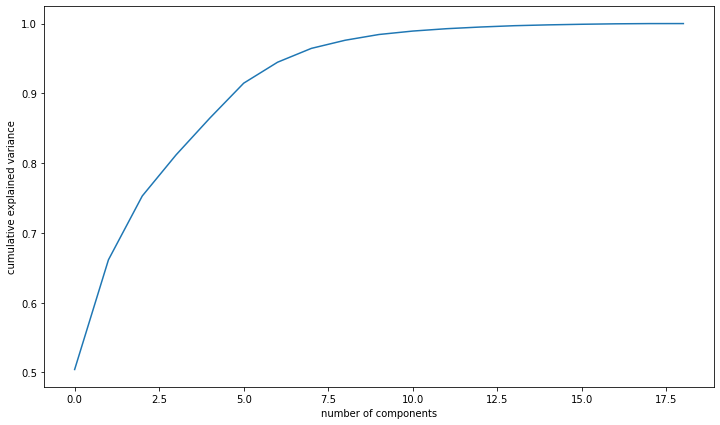

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
normalized_X_train = StandardScaler().fit_transform(X_train[:, :])
normalized_X_test = StandardScaler().fit_transform(X_test[:, :])

plt.figure(figsize=(12, 7))
pca = PCA().fit(normalized_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [25]:
# as we can see in the graph the variance is practically 1 for 11 components
projected_pca = PCA(n_components=11)
projected_X_train = projected_pca.fit_transform(normalized_X_train)
projected_X_test = projected_pca.fit_transform(normalized_X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Score: 0.7171268237934906
Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
accuracy score is 0.4983164983164983
f1 score is [0.52439024 0.28965517 0.43971631 0.73611111]


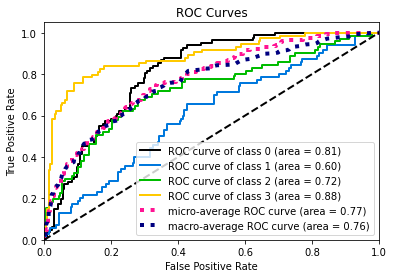

In [26]:
process(projected_X_train, projected_X_test, encoded_y_train)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

The depth-10 tree achieves the best mean cross-validation accuracy 67.38616 +/- 4.65016% on training dataset


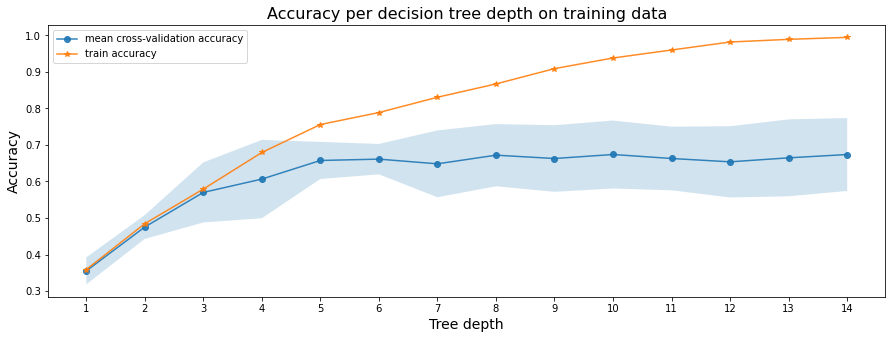

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#dtc = DecisionTreeClassifier()
#dtc.fit(projected_X_train, encoded_y_train)

tree_depths = range(1, 15)
cv_scores_list = []
cv_scores_std = []
cv_scores_mean = []
accuracy_scores = []
for depth in tree_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(
        tree_model,
        projected_X_train,
        encoded_y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_scores_list.append(cv_scores)
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())
    accuracy_scores.append(
        tree_model.fit(projected_X_train, encoded_y_train).score(projected_X_train, encoded_y_train)
    )

cv_scores_mean = np.array(cv_scores_mean)
cv_scores_std = np.array(cv_scores_std)
accuracy_scores = np.array(accuracy_scores)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(tree_depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
ax.fill_between(tree_depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)

ax.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
ax.set_title('Accuracy per decision tree depth on training data', fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

ax.set_xticks(tree_depths)
ax.legend()

idx_max = cv_scores_mean.argmax()
best_tree_depth = tree_depths[idx_max]
best_tree_cv_score = cv_scores_mean[idx_max]
best_tree_cv_score_std = cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      best_tree_depth, round(best_tree_cv_score*100,5), round(best_tree_cv_score_std*100, 5)))

In [28]:
dtc_model = DecisionTreeClassifier(max_depth=depth).fit(projected_X_train, encoded_y_train)
accuracy_train = dtc_model.score(projected_X_train, encoded_y_train)
accuracy_test = dtc_model.score(projected_X_test, encoded_y_test)
print('Single tree depth: ', depth)
print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

Single tree depth:  14
Accuracy, Training Set:  99.6357 %
Accuracy, Test Set:  48.48485 %


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [29]:
from sklearn.ensemble import BaggingClassifier
import sklearn

In [30]:
# Utility function for generating, evaluating and plotting models

alghorithms_range = np.arange(2, 100, 5)

def generate(model):
    models = dict()
    for alghorithm_number in alghorithms_range:
        models[alghorithm_number] = BaggingClassifier(base_estimator = model, n_estimators = alghorithm_number)
        models[alghorithm_number].fit(X_train, y_train)
    return models

def evaluate(model):
    prediction = model.predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    f1_score_ = f1_score(prediction, y_test, average='macro')
    return accuracy, f1_score_

def plot(models):
    f1_array = []
    accuracy_array = []
        
    for name, model in models.items():
        accuracy, f1_score = evaluate(model)
        accuracy_array.append(accuracy)
        f1_array.append(f1_score)
    plt.plot(alghorithms_range, f1_array)
    plt.grid()
    plt.xlabel("alghorithm number")
    plt.ylabel("f1 score")
    plt.show()
    
    plt.plot(alghorithms_range, accuracy_array)
    plt.grid()
    plt.xlabel("alghorithm number")
    plt.ylabel("accuracy")
    plt.show()

In [31]:
# Logistic regression
import warnings
warnings.filterwarnings('ignore')

base_model = LogisticRegression(solver = 'saga', tol = 1e-3, max_iter = 500, random_state = 42)
logistic_regression_models = generate(base_model)

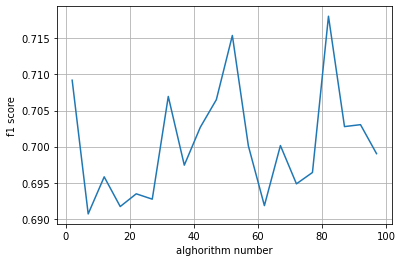

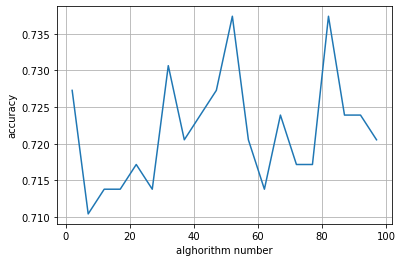

In [32]:
plot(logistic_regression_models)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Random forest
f1_array = []
accuracy_array = []
number_of_trees = range(1, 51)
for i in number_of_trees:
    random_forest_model = RandomForestClassifier(n_estimators=i)
    random_forest_model.fit(X_train, y_train)
    prediction = random_forest_model.predict(X_test)
    f1_array.append(sklearn.metrics.f1_score(y_test, prediction, average='macro'))
    accuracy_array.append(sklearn.metrics.accuracy_score(y_test, prediction))

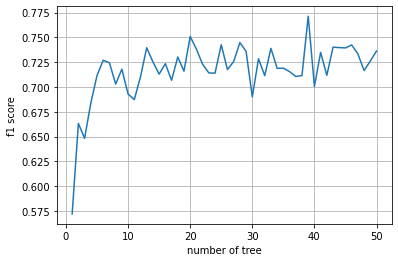

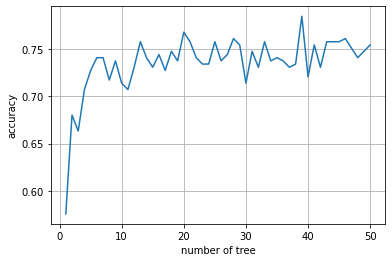

In [48]:
plt.plot(number_of_trees, f1_array)
plt.grid()
plt.xlabel('number of tree')
plt.ylabel('f1 score')
plt.show()

plt.plot(number_of_trees, accuracy_array)
plt.grid()
plt.xlabel('number of tree')
plt.ylabel('accuracy')
plt.show()

Plot shows that optimal number of tree is 20

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

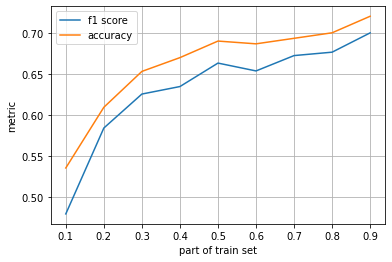

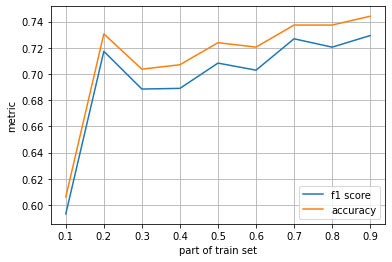

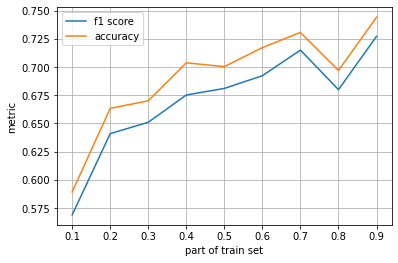

In [49]:
import warnings
warnings.filterwarnings('ignore')

X_train_split = []
y_train_split = []

for i in range(1, 10):
    X_train_split.append(X_train[0: int(0.1 * len(X_train) + 1) * i])
    y_train_split.append(y_train[0: int(0.1 * len(X_train) + 1) * i])

logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
decision_tree_model = DecisionTreeClassifier(max_depth=15)
random_forest_model = RandomForestClassifier(n_estimators=20)

models = [BaggingClassifier(logistic_regression_model, n_estimators = 22),
          BaggingClassifier(decision_tree_model, n_estimators = 28),
          random_forest_model]
    
for model in models:
    f1_array = []
    accuracy_array = []
    for i in range(0, 9):
        model.fit(X_train_split[i], y_train_split[i])
        f1 = sklearn.metrics.f1_score(y_test, model.predict(X_test), average='macro')
        accuracy = sklearn.metrics.accuracy_score(y_test, model.predict(X_test))
        f1_array.append(f1)
        accuracy_array.append(accuracy)
    
    plt.plot(np.linspace(0.1, 0.9, 9), f1_array, label="f1 score")
    plt.grid()
    plt.xlabel('part of train set')
    plt.ylabel('metric')
    plt.plot(np.linspace(0.1, 0.9, 9), accuracy_array, label="accuracy")
    plt.xlabel('part of train set')
    plt.ylabel('metric')
    plt.legend()
    plt.show()